In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import figure
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
import random

**Group member**

Amin Angelo Mezouari (#78596277)
- Describe and explain models, deriving optimality conditions, simulating models and graphing results.

Esperanza Clarissa (#89653729)
- Drawing flow charts, writing, proof reading and improve function readability

Miyu Nakayama (#57320970)
- Coding and writing in latex, discussing results



# Introduction

In today's fast-paced and interconnected world, technological advancements have played a pivotal role in shaping our civilization, catalyzing innovation, and driving the living standards in our societies. For most of human history, income per capita growth was glacially slow. In the 19th century, the average world income was roughly as high as in the Neolithic age. It is due to the various technology advancements in the last two centuries, our current GDP per capita has grown to around 40 times as that of the 1800s. 

However, techology does not constantly grow linearly nor exponentially; rather, its growth has a certain aspect of randomness. Random disruptive events that increase/decrease the efficiency of our production is also known as technological shocks. For example, discovery of nuclear energy and the advancement of information and communication technology has largely improved our productivity, while in the case of events such as pandemics, nuclear accidents or large-scale system failures, we have been compelled to re-construct our systems, while at the same time causing temporary stagnation or negative economic growth.

While students are introduced with different economic models and their mathematical derivations in an Intermediate Macroeconomic Analysis course, they did not spend enough time to build, construct the model to explore and observe its behaviours. The goal of this project is to simulate an model where technology is improving over time but there are random technology shocks that will influence agent's production, utility and decision making.

### Research questions

Q1: How will the representative agent allocate their consumption, investment and labour decisions in an economy where there are constant techological growth and random techological shocks?

Q2: How does the initial state of a representative agent affect its total lifetime utility in the toy economy?

Q3: What level of initial consumption and capital can maximize an agent's lifetime utility?


### Scope of project

- **Functions, Control flow**: Deriving mathematical theorem and code corresponding theorm/equation as functions 

- **Applied linear algebra**: Intergrating functions, simulating and storing the data using metrices 

- **Randomness, Time Series**: Generate random technology shocks using auto-regressive model 

- **Basic functionality**: Stroing data in pandas dataframe and calculate aggregate statistic or series transformation 

- **Plotting**: Plotting the result with appropriate type of graphs, colors and labels 

- **Regression**: Using sklearn model to perform LassoRegression and evaluate the outcome 


## Background Information 

### The social planner model 

A social planner model is a deliberately simple model which allows us to demonstrate and analyze economic concepts in a more concise manner. The idea is there is a (hypothetical) all-knowing being called the "Social Planner" that controls the allocation of resources in this economy. Here are some characteristics of this Social Planner:

- He knows everything about the society that needs to be known for economic efficiency, including individual preferences, production technologies, and resource endowments.

- He is a dictator that has the authority to determine how much each agent consume, invest, work and produce. However, his goal is to optimize the utility level of his citizens.

- Since the Social Planner has complete information about preferences and can directly allocate resources and goods to maximize social welfare, the pricing system is relevant to coordinating the allocation of resources.

The Social Planner Model does have its limitations, but in this context, it provides a theoretical framework to understand the basic macroeconomic behavior to build other models with more complexity.

### The neoclassical growth model and the real business cycle model

The neoclassical growth model (also known as Solow growth model) is used to demonstrate and explain long-run economic growth. One of its key principles is that long-run growth can be only be explained by techological growth and capital accumulation. Particularly, the total factor productivity grows exponentially with time with a constant growth rate of technology.

On the other hand, the real business cycle theory suggests that technological growth happens in shocks, and that causes fluctuations in levels of consumption, investment, labour and production. In the project, the goal is to simulate technological shocks as random and unpredictable events, which may arise from various sources such as innovations, changes in production techniques, or shifts in productivity levels. In this model, the total factor productivity is affected by the random technological shocks.

# Methodology and Results

### The social planner model
We assume our utility function in the social planner and neoclassical growth model to be the constant relative risk aversion(CRRA) utility function.

$$u(c) = \begin{cases}
\frac{c^{1-\sigma}}{1-\sigma} \text{  for } \sigma ≥ 0 \\
ln(c) \text{ for } \sigma = 1
\end{cases}$$

Where $c$ is the consumption level and $\sigma$ is the agent's risk aversion level.

A feature of this utility function is that it satisfies Inada conditions with respect to the consumption level. In this project, we will assume $\sigma=1$.

#### Optimization problem

$$ 
\max_{c_t, k_{t+1},l_t} \sum_{t=0}^{T} \beta^t \cdot u(c_t) \\
\text{s.t.} \quad c_t + k_{t+1} = y_t + (1- \delta) k_t \\
\text{and} \quad y_t=A \cdot k^ \alpha_t \cdot l_t^{1- \alpha}
$$

**Endogenous parameters**

Decision Variables

$c_t \in [0,\infty)$ -   Consumption: The amount agent is consuming at period $t$ 

$k_{t+1} \in [0,\infty)$  - Capital Investment: The amount of investment for production at ${t+1}$ period (decision made at time t)

$l_{t} \in [0,1]$ - The proportion of time individual spend on working at period $t$


Dependent Variables

$u_{t} \in \mathbb{R}$ - Utility at period t

$y_{t} \in [0,1]$ - The national product at period t

**Exogenous parameters**

$\beta \in [0,1]$ - Discount factor: the impatience of the agent in relation to consumption over time.

- A high beta indicates higher levels of equality in agent value consumption between periods.

$\alpha \in [0,1]$ - Capital share: return on an investment

- A high alpha indicates a high return on investments.

$\delta \in [0,1]$ - Capital depreciation rate

- A lower delta indicates slower depreciation. 

$A \in (0,\infty)$ - Total factor productivity: scales the inputs to the output

- A large $A$ indicates efficient and advanced technology.

**Some features of this optimization problem**

- The agent has three options of action with their current possession of resources: consume, invest for production in the next period, or work for production. 

- Increased consumption increases utility for the agent, but reduces the amount it can produce in the next period.

- How much individuals can consume and invest in the next period is determined by the amount of investment today. Hence, there is a trade-off between instant increase utility and $k_{t+1}$

- If the investment goes to 0, the agent cannot live for another period because it has run out of resources.

In order to simpify our model, there are two assumptions
- Since there is no disutility from labour, the agent work all the time to maximize their production.

- Technology stays constant.

These will simplify our constraint into
$$ \begin{align}
A &= 1\\
l_t &= 1. \\
c_t + k_{t+1} &= k^\alpha + (1- \delta) k_t \\
\end{align}$$

**See appendix 1 for the process of deriving the lagrangian.**

Solving for the lagrange multiplier will yield the following equations that relates consumption and
investment over time:

**Intertemporal Euler equation**

$c_{t+1} = \beta(\alpha \cdot k^{\alpha-1}_{t+1} + (1-\delta)) \cdot  c_t$ 

- The equation describes the relationship between consumptions in adjacent periods.
- Households must follow this decision rule in order to maximize their utility.

**Investment Law of motion**

$ k_{t+1} = k^\alpha_t + (1-\delta)k_t - c_t$

- The equation describes investment decisions over time.
- Investment for the next period is equal to the resources available currently minus the consumption

These two equations combined describe an economy such that:
1. The result is Pareto optimal; any other allocations of $c_t$ and $k_{t+1}$ that satisfy the constraint but does not satisfy the Euler equation will yield a lower life-time utility.

2. For optimal utility, the agent's consumption at each period is determined by the Euler equation. After this process, the agent's investent towards the next peirod is determined by the resource constraint.

### Main functions and flow chart of simulation ###

$$x_t =\begin{bmatrix}
           c_{t} \\
           k_{t+1} \\
           u_{t} \\
           y_{t}
         \end{bmatrix}
$$

$c_t$ : Consumption at time t

$k_{t+1}$ : Investment for time t+1

$u_t$ : Utility at time t

$y_t$ : Output at time t

#### Flow chart of `next_period_sp` function ####

1. **Constant relative risk aversion function** 

(CRRA): $c_t \rightarrow u_t$

$$u(c) = \begin{cases}
\frac{c^{1-\sigma}}{1-\sigma} \text{  for } \sigma ≥ 0 \\
ln(c) \text{ for } \sigma = 1
\end{cases}$$

2. **Intertemporal Euler Equation**

(IEE): $(c_t,k_{t+1}) \rightarrow c_{t+1}$

$$c_{t+1} = \beta(\alpha \cdot k^{\alpha-1}_{t+1} + (1-\delta)) \cdot  c_t$$

3. **Investment Law of Motion**

(ILM): $(c_t,k_t) \rightarrow k_{t+1}$

$$ k_{t+1} = k^\alpha_t + (1-\delta)k_t - c_t$$

4. **Production function**

(Output function): $k_t \rightarrow y_{t}$

$$ \quad y_t=A \cdot k^ \alpha_t \cdot l_t^{1- \alpha} $$





**The graph below describes the execution flow in next period function, where blue arrows are the inputs and red arrows are the output.**

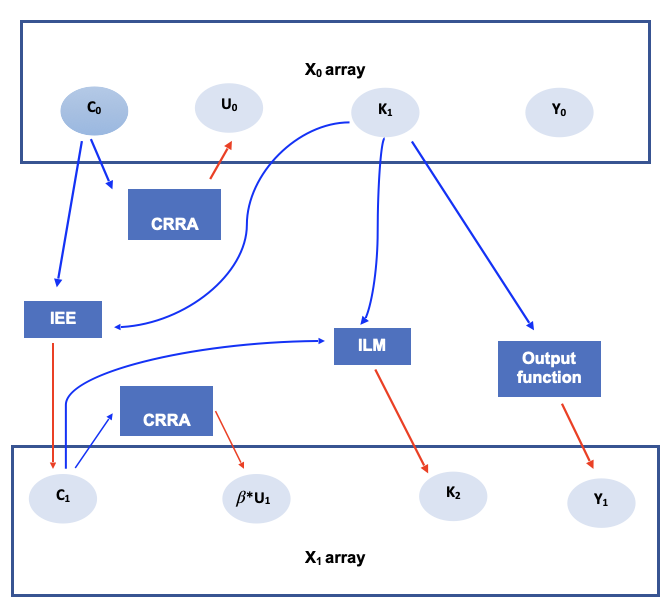

In [10]:
alpha=0.8
beta=0.998
delta=0.12

#Constant risk aversion utility function
def crra_utility_function(consumption,sigma=1):
    """
    Constant relative risk aversion utility function. 
    Given a consumption level, return the utility of the agent.
    
    Input: Consumption level
    Output: Utility level
    """
    if sigma !=1:
        u=(1/(1-sigma))*(consumption**(1/(1-sigma))-1)
    elif sigma==1:
        u=np.log(consumption)
    
    return u

#Intertemporal Euler Equation function
def intertemporal_euler_equation_sp(x0,alpha,beta,delta):
    """
    Describe consumption decision over time.
    
    Inputs: an array of current state
    Output: consumption level at t+1 period
    """
    ct_1=beta*(alpha*(x0[1]**(alpha-1))+(1-delta))*x0[0]
    return ct_1

#Investment law of motion
def investment_law_of_motion_sp(ct,kt,alpha,delta):
    """
    Describe how investment changes over time 
    
    Inputs: Consumption at t period and Investment at t period
    Output: Investment at t+1 period 
    
    """
    kt_1=kt**alpha+(1-delta)*kt-ct
    return kt_1

#Production function
def output_sp(kt,alpha):
    """
    Produce the production at current level given the investment from last period
    
    Inputs: Investment level at t 
    Output: Output level at t
    """
    y=kt**alpha
    return y


#Function taking the above functions to produce the next state
def next_period_sp(x0,alpha,beta,delta,bu):
    """
    Given an array of current state of consumption,investment and utility level [ct,kt_1],
    produce an array describing the next state
    """
    ct_1=intertemporal_euler_equation_sp(x0,alpha,beta,delta)
    kt_2=investment_law_of_motion_sp(ct_1,x0[1],alpha,delta)
    x1=np.array([ct_1,kt_2,bu*crra_utility_function(ct_1),output_sp(x0[1],alpha)])
    return x1

#Simulation of the economy 
def simulate_sp(x0,T,alpha=alpha,beta=beta,delta=delta):
    """
    simulate and recrod the history of the economy by T period
    shut down the simulation if investment of next period goes below 0
    """
    nX = x0.shape[0]
    out = np.zeros((T, nX))
    out[0, :] = x0

    for t in range(1, T):
        out[t, :] = next_period_sp(out[t-1, :],alpha,beta,delta,beta**t)
        if out[t,1] <=0:
            break
    return out[0:t,:]

#calculate the liftime utility

#Plot the simulation and variables
def plot_simulation(x0, T,alpha,beta,delta):
    X = simulate_sp(x0, T,alpha,beta,delta)
    fig, ax = plt.subplots(2,2)
    ax[0,0].plot(X[:, 0])
    ax[0,1].plot(X[:, 1])
    ax[1,0].plot(X[:, 2])
    ax[1,1].plot(X[:, 3])
    ax[0,0].set_xlabel("time")
    ax[0,1].set_xlabel("time")
    ax[1,0].set_xlabel("time")
    ax[1,1].set_xlabel("time")
    ax[0,0].set_ylabel("number of units")
    ax[1,0].set_ylabel("number of units")
    ax[0,0].set_title("Consumption")
    ax[0,1].set_title("Investment")
    ax[1,0].set_title("Utility")
    ax[1,1].set_title("Output level")
    fig.tight_layout()
    return ax

### Helper functions

In [11]:
#create a table of result
def create_table(result):
    """
    Change the result of simulation into dataframe
    """
    data={
        "Consumption":result[:,0],
        "Investment":result[:,1],
        "Utility":result[:,2],
        "Production":result[:,3]
    }
    periods=np.arange(len(result))
    df=pd.DataFrame(data,index=periods)
    return df

def lifetime_utility(table):
    """
    Compute the liftime utility from the simulation
    """
    return table.cumsum().iloc[-1]["Utility"]

### Scenario one: Normal Individual with different discount factors ###

The total lifetime utility of the agent is 245.86293217210084


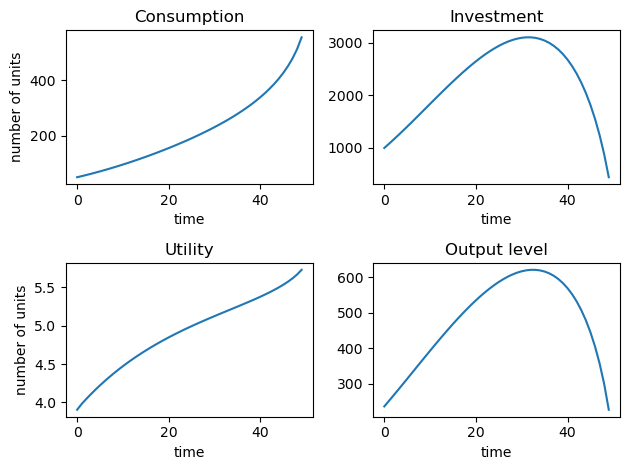

In [12]:
alpha=0.8
beta=0.998
delta=0.12

Normal_individual=np.array([50,1000,beta*crra_utility_function(50),output_sp(924.99930,alpha)])#Create an initial state

table1=create_table(simulate_sp(Normal_individual,60,alpha,beta,delta))

print("The total lifetime utility of the agent is",lifetime_utility(table1))

plot_simulation(Normal_individual,60,alpha,beta,delta)
plt.show()

**Explanation:**

In this example, the agent's consumption increases over time. As the success on investment of production  is high (alpha=0.8) and the agent is patient (beta=0.998), the agent chooses to consume more later on in his life.

In the final 15 periods, the individual's consumption increases more rapidly than production. Its investment starts decreasing around period 32. However, the decrease in investment drives up the coefficient between $c_t$ and $c_{t+1}$ (since investment is raised to the negative power in the Euler's equation), hence it leads to depleting resources around period 50.

In [ ]:
alpha=0.8
beta=0.95
delta=0.12

Normal_individual=np.array([50,1000,beta*crra_utility_function(50),output_sp(924.99930,alpha)])#Create an initial state

table1=create_table(simulate_sp(Normal_individual,60,alpha,beta,delta))

print("The total lifetime utility of the agent is",lifetime_utility(table1))

plot_simulation(Normal_individual,60,alpha,beta,delta)
plt.show()

The total lifetime utility of the agent is 73.38011983750832


**Explanation:**

In this example, the agent's consumption first increases then decrease over time. The only difference compared to the last period is the discount factor, or in other words, the level of "patience" of the individual (beta=0.95). As beta becomes smaller, the agent values consumption at earlier periods a lot more than later on in life. 

In the beginning, the high alphas and lower levels of investment drives consumption up. Around period 20, the discount rate starts to have a greater effect on the agent's consumption pattern. Compared to a discount rate of 0.998, the agent will only value consumption 4% less after 20 periods. On the other hand, a discount rate of 0.95 leads to a 65% decrease on utility after 20 periods. Therefore, the agent chooses to consume earlier in his life rather than later.

$$0.998^{20}=0.967...$$
$$0.95^{20}=0.3584...$$

### Scenario two: Rich Agent and Poor Agent ###

The total lifetime utility of the agent is 315.34587690440424


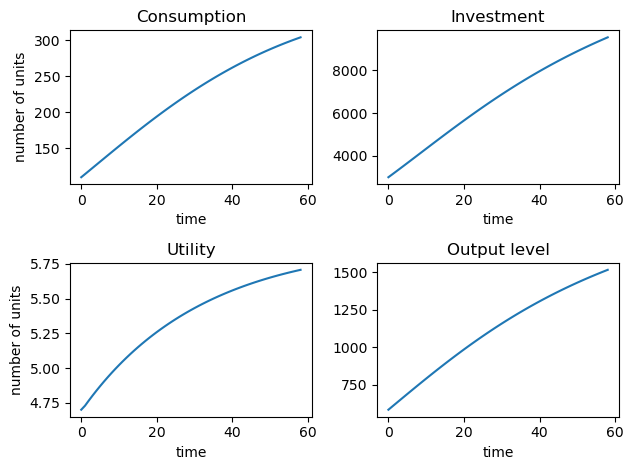

In [7]:
#Scenario 2-1: Richer individual
alpha=0.8
beta=0.998
delta=0.12

Rich_individual=np.array([110,3000,crra_utility_function(110),output_sp(2870,alpha)])

table2=create_table(simulate_sp(Rich_individual,60,alpha,beta,delta))

print("The total lifetime utility of the agent is",lifetime_utility(table2))

plot_simulation(Rich_individual,60,alpha,beta,delta)
plt.show()

**Explanation:**

In this example, the **rich** individual agent has three times more initial investment available, yet only consumes two times more than the **normal** individual. As the graph shows, both the rich and normal individuals are able to snowball their investment while maintaining high levels of consumption. The result is that the richer agent is able to obatin a higher lifetime utility than a normal individual with the same parameters. In addition, the rich agent is able to live for at least 50 periods longer than the normal agent.

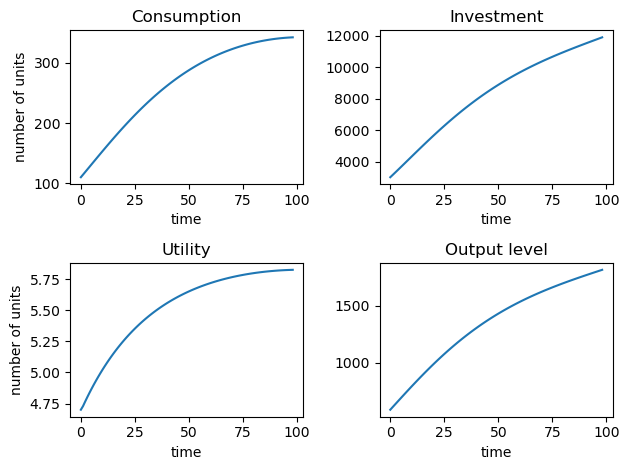

In [27]:
plot_simulation(Rich_individual,100,alpha,beta,delta)
plt.show()

The total lifetime utility of the agent is 59.96277693161395


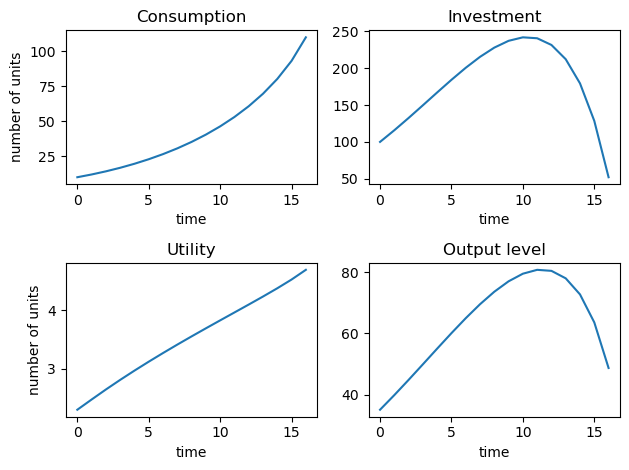

In [28]:
#Scenario 2-2: Poor individual
alpha=0.8
beta=0.998
delta=0.12

Poor_individual=np.array([10,100,crra_utility_function(10),output_sp(85.20093,alpha)])

table3=create_table(simulate_sp(Poor_individual,60,alpha,beta,delta))

print("The total lifetime utility of the agent is",lifetime_utility(table3))

plot_simulation(Poor_individual,60,alpha,beta,delta)
plt.show()

**Explanation:**
    
As an analogous result of the last scenario, the poor agent tends to consume as much as possible with all the resources they have. The poor agent with low initial capital is able to produce for several periods, but its resources are quickly depleteed as it cannot keep up with the increase in consumption designated by the euler equation.

### Initial condition and lifetime utility

From the examples above, initial conditions seem to have significant effect on the the agents' total lifetime utility. In order to discover how lifetime utility reacts to the initial level of consumption and investment, w a matrix that records different grids of consumption and investment is created and displayed with a heatmap to visualize the agents' lifetime utility.

In [30]:
sp_datas=np.zeros((250,3000))

alpha=0.8
beta=0.998
delta=0.12

for row in range(1,(np.shape(sp_datas)[0])):
    for col in range(1,(np.shape(sp_datas)[1])):
        initial=np.array([row,col,crra_utility_function(col),0])
        sp_datas[row,col]=sum(simulate_sp(initial,60,alpha,beta,delta)[:,2])

`sp_datas` is a matrix with it rows being consumption levels and columns being investment levels. The value in the entries of `sp_datas` is the total lifetime utility that the agent obtained from initializing at `row` level of consumption and `column` level of investment.

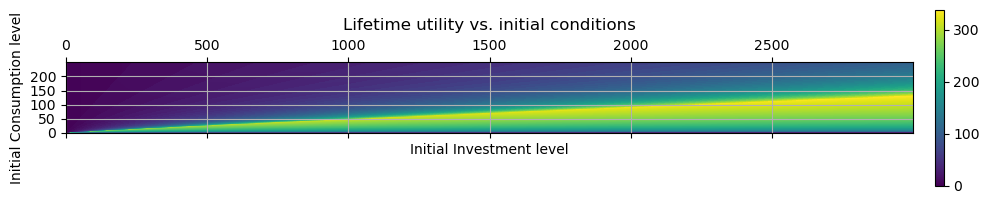

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
cax = ax.matshow(sp_datas, interpolation='nearest')
bar=fig.colorbar(cax,fraction=0.01, pad=0.025)
ax.set_xlabel("Initial Investment level")
ax.set_ylabel("Initial Consumption level")
ax.set_title("Lifetime utility vs. initial conditions")
ax.invert_yaxis()
ax.grid(True)

fig.tight_layout()
plt.show()


\* Note: the colorbar corresponds to utility level.

**Explanation:**

After plotting the lifetime Investment and Consumption for various initial conditions, the resulting heatmap indicates a steadily increasing lifetime utility level as initial investment and initial consumption increase. The graph provides us several insights from the simulation:
1. For every fixed investment level, the optimal level of consumption seems to be a fixed ratio with the current investment level. 
2. For a specific investment level, when consumption approaches the optimal line, the lifetime utility gradually increases. This is shown by the gradient of colour below the line. 
3. However, once the consumption level passes the optimal consumption level, the utility drastically decreases. This implies that there is a threshold of consumption for available resources. Once the agent consumes too much in proportion to the current level of investment put into production, resources deplete quickly and result in lower total lifetime utility. 

The code below attempts to find the optimal consumption level for a given combination of investments and the lifetime utility it produces.

In [12]:
x=[]
y=[]
z=[]

for col in range(1,3000):
    x.extend([col])
    y.extend([sp_datas[:,col].argmax()])
    z.extend([sp_datas[:,col].max()])

data={
"Investment":x,
"c_optimal":y,
"u_optimal":z}

optimal_results=pd.DataFrame(data)

optimal_results["Investment_to_Consumption_ratio"]=optimal_results["Investment"]/optimal_results["c_optimal"]


optimal_results.tail(10)

,Investment,c_optimal,u_optimal,Investment_to_Consumption_ratio
2989,2990,130,337.779729,23.000000
2990,2991,130,337.738928,23.007692
2991,2992,130,337.698340,23.015385
2992,2993,130,337.657958,23.023077
2993,2994,130,337.617776,23.030769
2994,2995,130,337.577790,23.038462
2995,2996,130,337.537994,23.046154
2996,2997,130,337.498384,23.053846
2997,2998,130,337.458955,23.061538
2998,2999,130,337.419704,23.069231


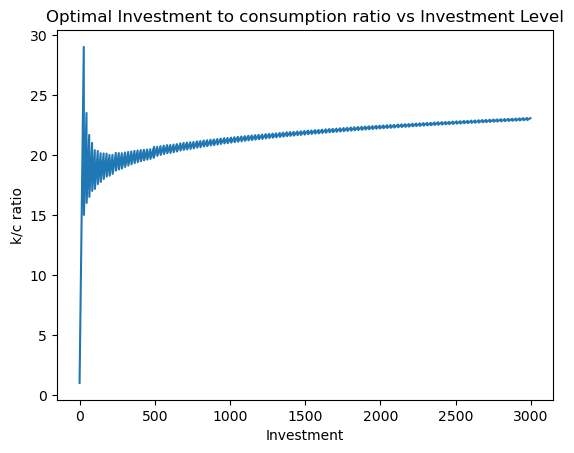

In [13]:
optimal_results.Investment_to_Consumption_ratio.plot(title="Optimal Investment to consumption ratio vs Investment Level",
                                                     xlabel="Investment",
                                                     ylabel="k/c ratio"
)
plt.show()

The graph above shows that, as investment increases, the ratio between consumption and investment approaches a certain value. In this case, the highest lifetime utility is reached  when the investment level is 22 to 23 times more than the consumption at the initial state.

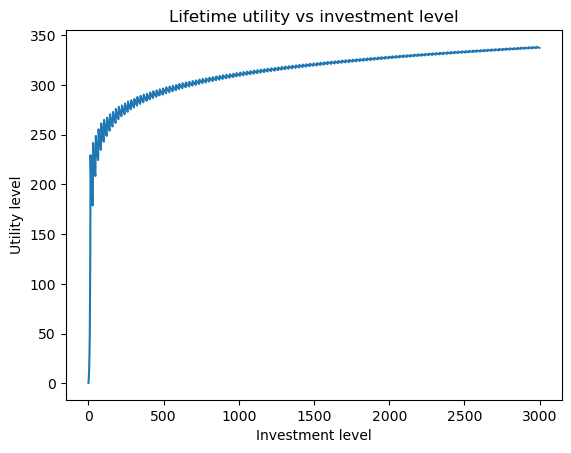

In [57]:
optimal_results.u_optimal.plot(title="Lifetime utility vs investment level",
                                                     xlabel="Investment level",
                                                     ylabel="Utility level"
                                                    )
plt.show()

The above shows that if the agent decides to follow the optimal ratio between investment and consumption, its utility level will increase at a decreasing rate. This is not suprising as it is one of the main features of the CRRA utility function. The utility level is the log of consumption. Since investment level is only the multiple of consumption at the optimal ratio, the same condition also holds for investment.

### Neoclassical Growth model

$$ 
\max_{c_t, k_{t+1}} \sum_{t=0}^{T} \beta^t \cdot u(c_t) \\
\text{s.t.} \quad c_t + k_{t+1} = {A_t} \cdot k^ \alpha_t + (1- \delta) k_t, \\
y_t=A_t \cdot k^ \alpha_t \\
A_t = A_0(1+g)^t
$$

The Neoclassical Growth model will use the same utility function and structure as the Social Planner model. The key difference between the two is that the latter assumes technology to be constant over time. In the NCG model, technology is evolving at the rate of $g$ for every period. This technology factor also follows an exponential growth model, as existing technology will lead to further technological advancements throughout the time periods.

**Exogenous parameters**

$A_0=1$: Total factor productivity at time 0, by default we set it to 1

$A_t \in [0,\infty)$: Total factor productivity - The technology of production that evolves over time.

$g \in [0,1]$ : Technology growth rate - The growth rate of technology in percentages

### Main functions and flow chart of simulation ###

The functions of the NCG mode builds on the Social Planner model with the addition of $A_{t}$ in the production function that represents technological change over time. Hence the flow chart remains the same from social planner's problem



**Intertemporal Euler Equation (Neoclassical growth)**

(IEE): $(c_t,k_{t+1}) \rightarrow c_{t+1}$

$$c_{t+1} = \beta(\alpha \cdot A_{t+1}k^{\alpha-1}_{t+1} + (1-\delta)) \cdot  c_t$$

**Investment Law of Motion (Neoclassical growth)**
 
(ILM): $(c_t,k_t) \rightarrow k_{t+1}$

$$ k_{t+1} = A_tk^\alpha_t + (1-\delta)k_t - c_t$$

**Production function (Neoclassical growth)**

(Output function): $k_t \rightarrow y_{t}$

$$ \quad y_t=A_{t+1} \cdot k^ \alpha_t \cdot l_t^{1- \alpha} $$

where $$A_{t}=(1+g)^{t} \cdot A_0$$

In [42]:
t_growth=0.00   #technological growth 
alpha=0.8   #capital share 
beta=0.998  #Household patient
delta=0.12

## Neoclassical growth model per capita 
def A_t(t,t_growth,A0=1):
    """
    Given initial technological progress, and technological grwoth rate calculate the current tfp
    """
    At=A0*(1+t_growth)**t
    
    return At

def intertemporal_euler_equation_ncg(x0,At1,alpha,beta,delta):
    """
    Describe consumption decision over time.
    
    Input: Current state, tfp of NEXT period
    Output: Consumption in the next period
    """
    ct_1=(beta*((At1)*alpha*(x0[1]**(alpha-1))+(1-delta)))*x0[0]
    return ct_1

def investment_law_of_motion_ncg(ct,kt,At,alpha,delta):
    """
    Decribe investment decision over time.
    
    Input: Current consumption level, investment level and TFP of current period
    Output: Investmet in the next period
    """
    kt_1=(At*kt**alpha+(1-delta)*kt-ct)
    return kt_1

def output_ncg(kt,At,alpha):
    """
    Produce the national product using the cobb-douglas production function
    
    Input: Current level of investment and TFP
    Output: Natioanl product
    """
    y=At*kt**(alpha)
    return y

def next_period_ncg(x0,At_1,alpha,beta,delta):
    """
    Produce the state of economy in the next period
    
    Input: Current state, tfp of current and next period
    Output: Next economy state
    """
    ct_1=intertemporal_euler_equation_ncg(x0,At_1,alpha,beta,delta)
    
    kt_2=investment_law_of_motion_ncg(ct_1,x0[1],At_1,alpha,delta)
    
    x1=np.array([ct_1,kt_2,beta*crra_utility_function(ct_1),output_ncg(x0[1],At_1,alpha)])
    
    return x1

def simulate_ncg(x0,T,alpha=alpha,beta=beta,delta=delta,t_growth=t_growth):
    """
    simulate and recrod the history of the economy by T period
    """
    nX = x0.shape[0]
    out = np.zeros((T, nX))
    out[0, :] = x0

    for t in range(1, T):
        out[t, :] = next_period_ncg(out[t-1, :],A_t(t+1,t_growth),alpha,beta,delta)
        if out[t,1] <=0:
            break
    return out[0:t,:]

def plot_simulation_ncg(x0,T,alpha=alpha,beta=beta,delta=delta,t_growth=t_growth):
    X = simulate_ncg(x0,T,alpha=alpha,beta=beta,delta=delta,t_growth=t_growth)
    fig, ax = plt.subplots(2,2)
    ax[0,0].plot(X[:, 0])
    ax[0,1].plot(X[:, 1])
    ax[1,0].plot(X[:, 2])
    ax[1,1].plot(X[:, 3])
    ax[0,0].set_xlabel("time")
    ax[0,1].set_xlabel("time")
    ax[1,0].set_xlabel("time")
    ax[1,1].set_xlabel("time")
    ax[0,0].set_title("Consumption")
    ax[0,1].set_title("Investment")
    ax[1,0].set_title("Utility")
    ax[1,1].set_title("Output level")
    fig.tight_layout()
    return ax

#### Society with no growth vs. Society with constant growth
In order to demonstrate the effect of technology, we plot two societies where one has constant technology growth and one does not.

Comparing to constant technology, the model with 2% technology growth increased utility from 259.0 to 383.0


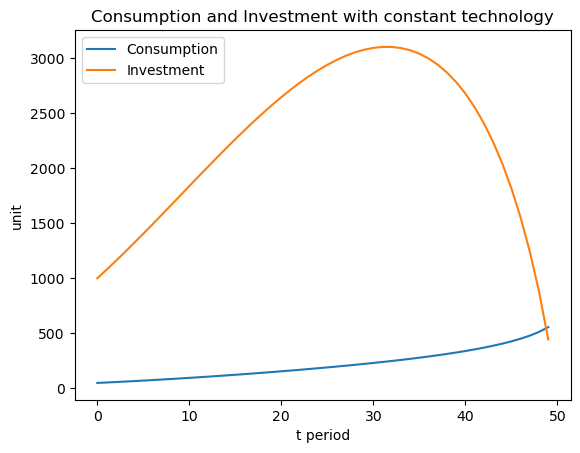

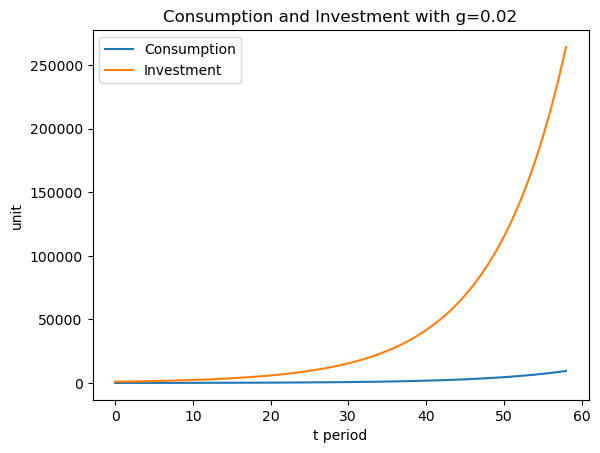

In [43]:
t_growth=0.02   #technological growth


create_table(simulate_sp(Normal_individual,60,alpha,beta,delta))[["Consumption","Investment"]].plot(title="Consumption and Investment with constant technology",xlabel="t period",ylabel="unit")
create_table(simulate_ncg(Normal_individual,60,alpha,beta,delta,t_growth))[["Consumption","Investment"]].plot(title="Consumption and Investment with g=0.02",xlabel="t period",ylabel="unit")


print("Comparing to constant technology, the model with 2% technology growth increased utility from",round(lifetime_utility(create_table(simulate_ncg(Normal_individual,60,t_growth=0))),0), 
      "to",round(lifetime_utility(create_table(simulate_ncg(Normal_individual,60,t_growth=t_growth))),0))
plt.show()

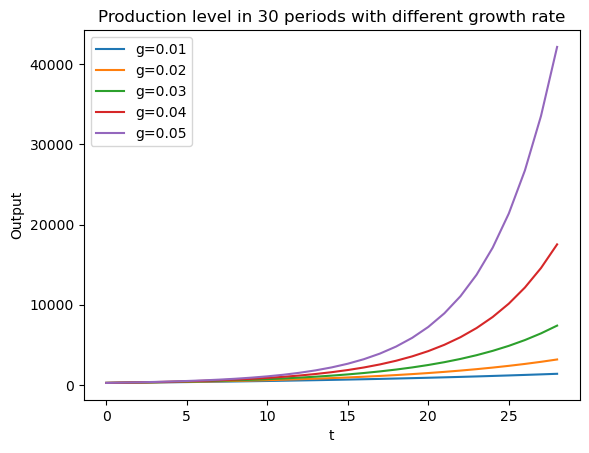

In [44]:
Normal_individual=np.array([50,1000,beta*crra_utility_function(50),output_sp(924.99930,alpha)])

t_1=create_table(simulate_ncg(Normal_individual,30,t_growth=0.01))
t_2=create_table(simulate_ncg(Normal_individual,30,t_growth=0.02))
t_3=create_table(simulate_ncg(Normal_individual,30,t_growth=0.03))
t_4=create_table(simulate_ncg(Normal_individual,30,t_growth=0.04))
t_5=create_table(simulate_ncg(Normal_individual,30,t_growth=0.05))

data1={
"g=0.01":t_1.Production,
"g=0.02":t_2.Production,
"g=0.03":t_3.Production,
"g=0.04":t_4.Production,
"g=0.05":t_5.Production}

data2={
"g=0.01":t_1.Utility,
"g=0.02":t_2.Utility,
"g=0.03":t_3.Utility,
"g=0.04":t_4.Utility,
"g=0.05":t_5.Utility
}

graph1=pd.DataFrame(data1).plot(title="Production level in 30 periods with different growth rate",xlabel="t",ylabel="Output")

The difference in growth rates can have a large impact on the production level of the economy. In this graph, a growth rate difference by only 2% led to a 6-fold difference in production in a span of 30 periods.

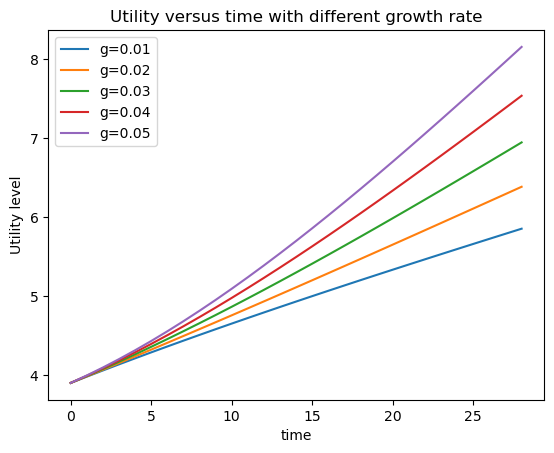

In [45]:
graph2=pd.DataFrame(data2).plot(title="Utility versus time with different growth rate",
                               xlabel="time",
                               ylabel="Utility level")

On the other hand, the growth rate affects lifetime utility only linearly, i.e. by increasing the slope, or the rate of utility growth. While the difference does not seem evident, notice that the utility function is the natural log of consumption, so that a difference of 3 on the y-axis is $e^3$ times the difference in consumption.

### Real Business Cycle/Neoclassical growth model

The Real Business Cycle model introduces technological *growth* and technological *shocks*. In addition, a new utility function is introduced to consider the effects of *labour* on utility.

**Greenwood–Hercowitz–Huffman (GHH) preferences**

$$ 
u(c,l)= log(c -\psi \frac{l^{1+\eta}}{1+\eta})
$$

Where

$\psi \in [0,\infty)$- Disutility of labour: The intensity that additional labour has on decreasing utility
- The higher the $\psi$, the higher the negative effect of labour on utility.

$\eta \in [0,\infty)$- Labour elasticity: The elasticity of changing labour.
- The smaller the $\eta$, the more sensitive utility changes with additional labour

The utility function also considers the amount of labour that contributes to utility. The utility level is negatively correlated with $l$, meaning that as $l$ approaches $1$, the more dissatisfied agents will be due to labour.

### Real Business cycle/Neoclassical Growth optimization problem

$$ 
\max_{c_t,l_t,k_{t+1}} E_0 \sum_{t=0}^{T} \beta^t \cdot u(c_t,l_t) \\
\text{s.t.} \quad c_t + k_{t+1} = y_t + (1- \delta) k_t, \\
y_t = A_tk^ \alpha_tl_t^{1-\alpha}\\
A_t = A_0(1+g)^te^{z_t}\\
z_t = \rho z_{t-1} + \sigma\epsilon_t\quad \epsilon_t \sim \mathcal{N}(0,1)
$$

The optimization problem is an expansion of Neoclassical growth model with some key differences:
1. Labour is a decision variable instead of a constant.
2. The total factor productivity is now multiplied by a shock factor $e^{z_t}$
3. $z_t$ follows auto-regressive AR(1) process. The shock at current period is linear between shock from last period and random variable $\epsilon_t$.

The random shock of technology is introduced by the following equation

$$z_t = \rho z_{t-1} + \sigma\epsilon_t\quad \epsilon_t \sim \mathcal{N}(0,1)$$

$\rho \in [0,1]$ - The proportion of shock from the last period that persists to the current period.

$\sigma \in [0,\infty)$ - The intensity of the random technological shock. 


The following two graphs demonstrate the effects of $\rho$ and $\sigma$ on fluctuations in technology.

In [53]:
def total_factor_productivity(t,zt,t_growth=t_growth,A0=1):
    """
    Produce the total_factor_productivity at perid t with random shocks and techology growth rate
    
    Input: Current period, technological shock
    Output: TFP at period t
    """
    At=A0*(1+t_growth)**t*np.exp(zt)
    return At

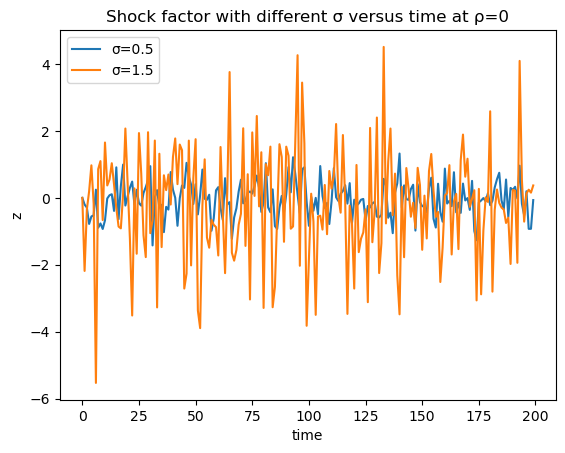

In [54]:
random.seed(2012)
rho=0.00
sigma=0.5
T=200

z1=np.zeros(T)
z2=np.zeros(T)
As=np.zeros(T)
As[0]=1

for t in range(1, T):
        z1[t]=rho*z1[t-1]+sigma*np.random.normal(0,1)
        z2[t]=rho*z2[t-1]+1.5*np.random.normal(0,1)
        As[t]=total_factor_productivity(t,z1[t],t_growth=0.00)
        
zt_data={
"σ=0.5":z1,
"σ=1.5":z2}

pd.DataFrame(zt_data).plot(title="Shock factor with different σ versus time at ρ=0",xlabel="time",ylabel="z")
plt.show()

From the graph, it is visible that the line associated with higher sigma has larger fluctuations.

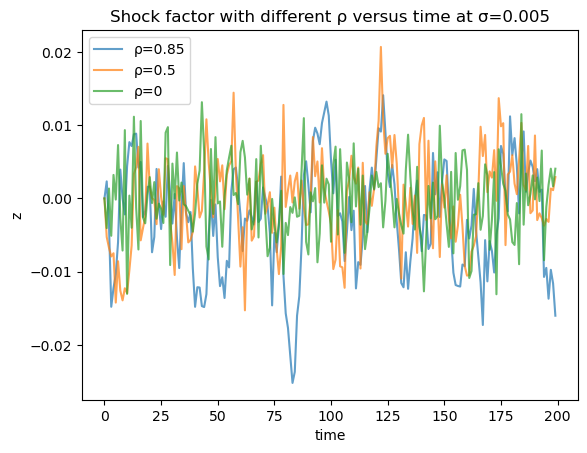

In [55]:
random.seed(2181)
rho=0.85
sigma=0.005
T=200

z1=np.zeros(T)
z2=np.zeros(T)
z3=np.zeros(T)
z4=np.zeros(T)
As=np.zeros(T)
As[0]=1

for t in range(1, T):
        z1[t]=rho*z1[t-1]+sigma*np.random.normal(0,1)
        z2[t]=0.5*z2[t-1]+sigma*np.random.normal(0,1)
        z3[t]=0*z3[t-1]+sigma*np.random.normal(0,1)
        As[t]=total_factor_productivity(t,z1[t],t_growth=0.00)
        
zt_data={
"ρ=0.85":z1,
"ρ=0.5":z2,
"ρ=0":z3}

pd.DataFrame(zt_data).plot(title="Shock factor with different ρ versus time at σ=0.005",xlabel="time",ylabel="z",alpha=0.7)
plt.show()

From the graph, the higher $\rho$ carries more shape and trend from the previous period. The line associated with $\rho$=0 is completly random around the mean of 0.

### Main functions and flow chart ###

The solution to the optimization problem can be expressed by this vector:

$$x_t =\begin{bmatrix}
           c_{t} \\
           k_{t+1} \\
           l_{t}\\
           u_{t} \\
           y_{t}
         \end{bmatrix}
$$

where

$c_t$ : Consumption at time t

$k_{t+1}$ : Investment for time t+1

$l_t$ : Labour at time t

$u_t$ : Utility at time t

$y_t$ : Output at time t

The key feature of this optimization problem compred to the last two models is that 
the individual and the planner both faced uncertainty about the shock in the future. Instead of directly calculating the relationship with consumption, individuals and the planner now have to make decisions based on the expected production in the future. This decision-making process will involve a method called **guess and verify**. 

Guess and verify is a strategy for the planner to distribute and allocate resources. We first assume the planner has a specific method of allocating output in the economy. The solution is then plugged back to the resource constraints and other first order conditions to make sure the policy will be satisfied by said constraints and the Intertemporal Euler's Equation. 

After the policy is proven, the policy is implemented into our model and simulates economy over time.


To use the guess and verify method, assume $\delta=1$ for simplification. The condition holds for rest of the model.

**See appendix 3 for process of deriving lagrangian and policy function**

**Labour profile** :

$l_{t} = (\frac{(1-\alpha)}{\psi} \cdot A_t k^{\alpha}_{t})^{\frac{1}{\eta+\alpha}}$ 

**Production function** :

$y_t=A_t k_t^{\alpha} l_t^{1-\alpha}$

**Planner's investment and consumption policy**

$k_{t+1}=\alpha\beta y_t$

$c_{t}=(1-\alpha\beta) y_t$

**Technology growth and shocks**

$A_t = A_0(1+g)^te^{z_t}\\$
$z_t = \rho z_{t-1} + \sigma\epsilon_t\quad \epsilon_t \sim \mathcal{N}(0,1)$


### Main functions and flow chart of simulation ###

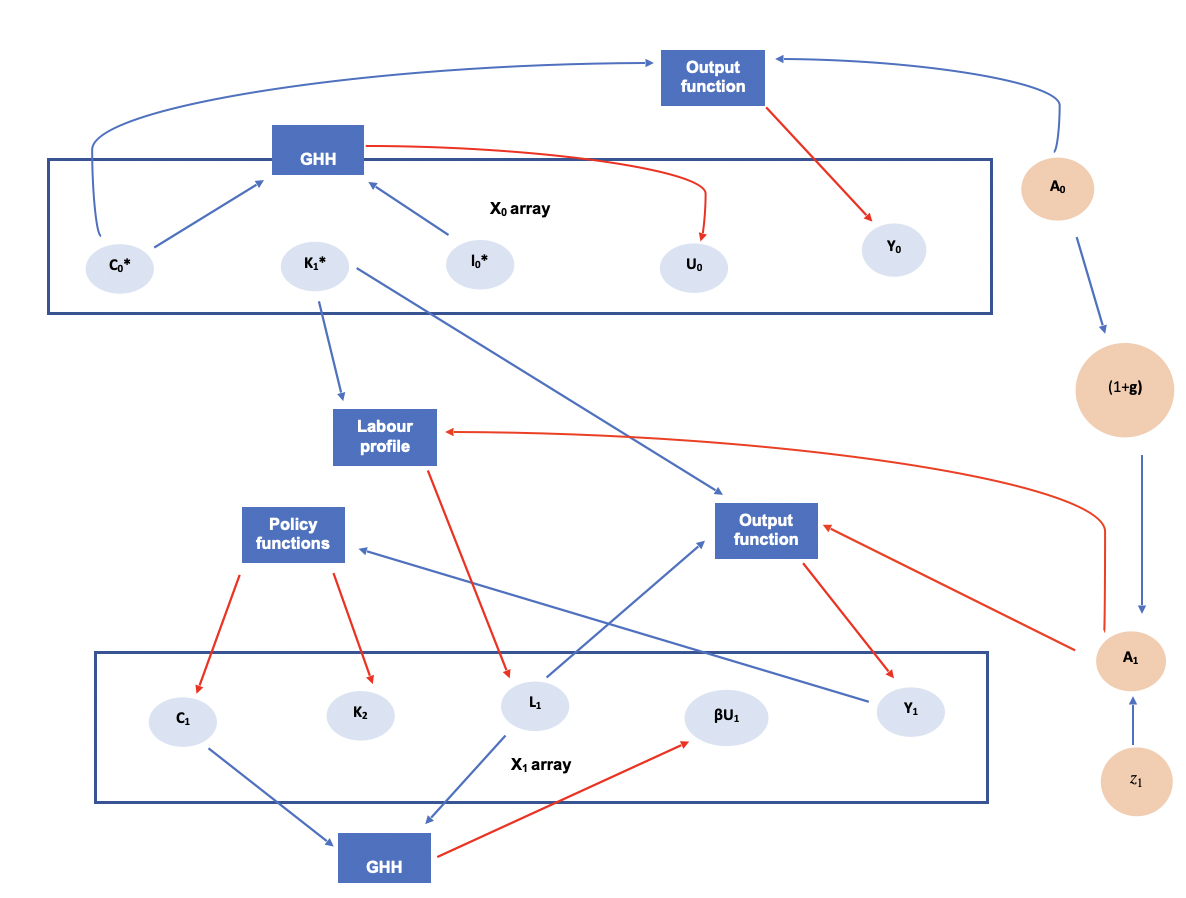

In [80]:
alpha=0.33
beta=0.995
psi=0.722
eta=0.5
t_growth=0.00

random.seed(1234)

def GHH_preference(c_t,l_t,psi=0.722,eta=0.5):
    """
    Produce the utility level according to GHH utility function
    
    Input: Consumption,Investment at period t
    Output: Utility level at period t
    """
    u_t=np.log(c_t-psi*((l_t)**(1+eta))/(1+eta))
    return u_t

def labour_profile(k_t,At,alpha=alpha,psi=0.722,eta=0.5):
    """
    Produce the amount of labour at time t
    
    Input: Capital investment for time t,TFP at time t
    Output: Labour at time t
    """
    
    return ((1-alpha)/psi*k_t**alpha)**(1/(alpha+eta))

def output(k_t,l_t,At,alpha=alpha):
    """
    Produce the output at period t
    
    Input:Investment at for time t
          Labour at time t
          TFP at time t
    Output: National Product at time t
    """
    return At*k_t**(alpha)*l_t**(1-alpha)

def consumption_policy(y_t,alpha,beta):
    """
    Produce the level of consumption at period t
    
    Input: National product at period t
    Output: Consumption at time t
    """
    return y_t*(1-alpha*beta)

def investment_policy(y_t,alpha,beta):
    """
    Produce the investment level for period t+1
    
    Input: National product at period t
    Output: Investment at period t+1
    """
    return y_t*alpha*beta
    
    
def next_period_rbc(x0,At_1,alpha=alpha,beta=beta,psi=psi,eta=eta):
    """
    Produce the state of economy in the next period
    
    Input: Current state, TFP of  next period
    Output: Next economy state
    """
    lt_1=labour_profile(x0[1],At_1,alpha,psi,eta)
    yt_1=output(x0[1],lt_1,At_1,alpha=alpha)
    ct_1=consumption_policy(yt_1,alpha,beta)
    kt_2=investment_policy(yt_1,alpha,beta)
    x1=np.array([ct_1,kt_2,lt_1,yt_1,beta*GHH_preference(ct_1,lt_1)])

    return x1

def simulate_rbc(x0,T,alpha=alpha,beta=beta,rho=0.65,sigma=0.025,t_growth=t_growth):
    """
    simulate and recrod the history of the economy by T period and generate random technology shock
    """
    nX = x0.shape[0]
    out = np.zeros((T, nX))
    out[0, :] = x0
    z=np.zeros(T)
    As=np.zeros(T)
    As[0]=1

    for t in range(1, T):
        z[t]=rho*z[t-1]+sigma*np.random.normal(0,1)
        As[t]=total_factor_productivity(t,z[t],t_growth=t_growth)
        out[t,:]=next_period_rbc(out[t-1,:],As[t],alpha,beta,psi,eta)
        if out[t,1] <=0:
            break
    return out[0:t,:]

In [81]:
def create_table2(result):
    """
    Change the result of simulation into dataframe
    """
    data={
        "Consumption":result[:,0],
        "Investment":result[:,1],
        "Labour":result[:,2],
        "Production":result[:,3],
        "Utility":result[:,4]
    }
    t=np.arange(len(result))
    df=pd.DataFrame(data,index=t)
    return df



In [107]:
random.seed(1234)
agent_1=np.array([0.15,0.05,0.3,0.2,GHH_preference(0.15,0.3)])


rbc_table_without_g=create_table2(simulate_rbc(agent_1,62,t_growth=0.00,sigma=0.025,rho=0.65))
rbc_table_with_g=create_table2(simulate_rbc(agent_1,62,t_growth=0.02,sigma=0.025,rho=0.65))


Let's first examine an economy with no technology growth but just random technological shocks.

In [108]:
def coefficient_of_variation(s):
    return np.abs(s.std()/s.mean())

rbc_table_without_g.agg(["mean","std",coefficient_of_variation])

,Consumption,Investment,Labour,Production,Utility
mean,0.111714,0.054231,0.286794,0.165945,-3.273424
std,0.009373,0.003920,0.008323,0.012624,0.158014
coefficient_of_variation,0.083906,0.072281,0.029019,0.076072,0.048272


Based on the above table, Consumption and Investment vary approximately the same with Production between consumption and investment. This is because the allocation policy shows that Production is a linear combination of investment and consumption. On the other hand, labour is less elastic than the output of the economy.

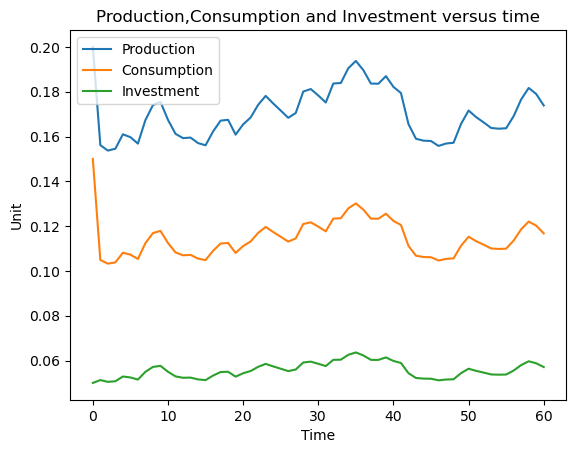

In [84]:
rbc_table_without_g[["Production","Consumption","Investment"]].plot(
    title="Production,Consumption and Investment versus time",xlabel="Time",ylabel="Unit")
plt.show()

From the graph above, production is the sum of consumption and investment in every period by the Social Planner's policy.

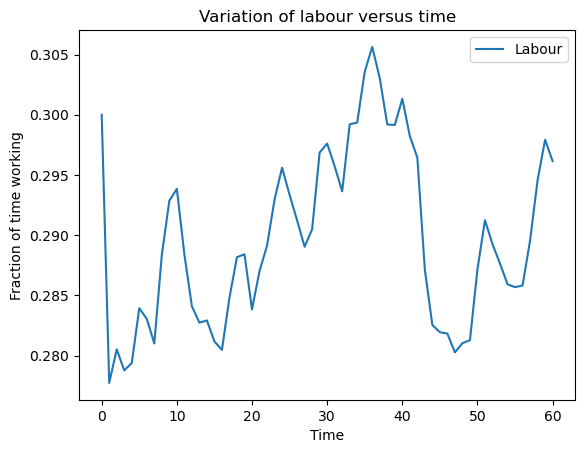

In [85]:
rbc_table_without_g[["Labour"]].plot(
    title="Variation of labour versus time",xlabel="Time",ylabel="Fraction of time working")
plt.show()

The graph above shows how labour fluctuates through time. Note that the pattern of labour is coincidential and positively correlated with changes in productivity. This implies that people work more during times of high technological efficiency, and less during times that are not as efficient. 

#### Constant Technological Growth

The following explores the case of an economy with constant technological growth.

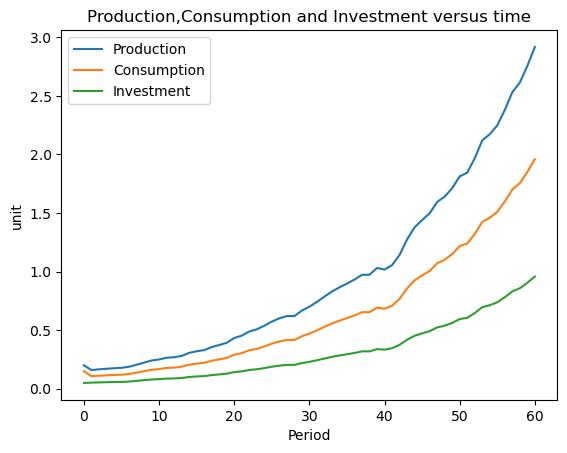

In [86]:
rbc_table_with_g[["Production","Consumption","Investment"]].plot(title="Production,Consumption and Investment versus time",ylabel="unit",xlabel="Period")
plt.show()

Constant technological growth yields a more persistent upward trend in Production, Consumption, and Investment compared to an economy affected only by random shocks.

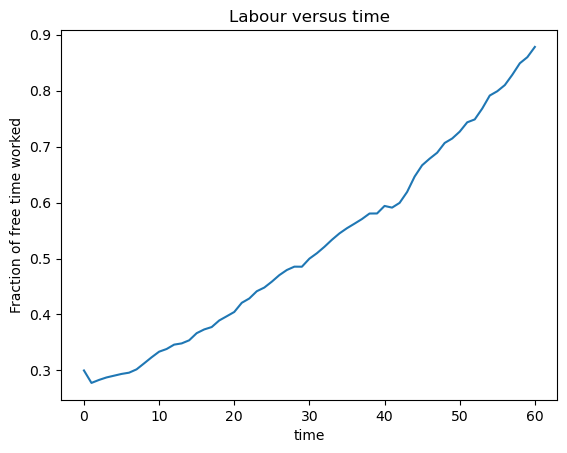

In [87]:
rbc_table_with_g.Labour.plot(xlabel="time",ylabel="Fraction of free time worked",title="Labour versus time")
plt.show()

Labour increases with productivity growth but at a slower rate. Note that the GHH utility function has no wealth effect, meaning that individual behaviour does not change depending on the current level of consumption.
- In a real world context, people tend to work less as they become wealthier.
- In this model, people will work depending on variables in labour profile but not depending on their current level of consumption.

This creates an interesting phenomenon where the agent works more during good times (high productivity) as it yields them more resources to consume in the next period, even if they are already consuming a decent amount in the current period.

### Trend of production in the economy

This section examines the trend of production in our model.

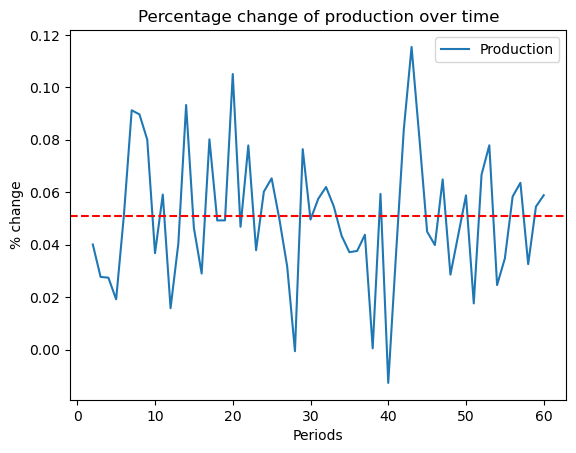

In [88]:
rbc_table_with_g[["Production"]].drop(0).pct_change().plot(title="Percentage change of production over time",xlabel="Periods",ylabel="% change")
plt.axhline(y = rbc_table_with_g["Production"].drop(0).pct_change().mean(), color = 'r', linestyle = '--')
plt.show()

The producivity shocks affect levels of production, but revolves around 5%, which is roughly equal to the arithmetic mean of the productivity growth rate. 

$$\frac{(1.02)^{60}}{60}=0.054...$$

## Regression on productivity over time ##

Since productivity is growing in a random and unpredictable fashion, a linear model could find the trend of productivity over time. First, the model is fit to see if changes to any existing variables are required. 

In [89]:
df=pd.DataFrame(data={"time":np.arange(61),"Production":rbc_table_with_g["Production"]})
df.head(n=12).T

,0,1,2,3,4,5,6,7,8,9,10,11
time,0.0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.00000,8.000000,9.000000,10.000000,11.000000
Production,0.2,0.159723,0.166122,0.170724,0.175404,0.178766,0.187935,0.20508,0.223466,0.241351,0.250223,0.265011


Text(0.5, 1.0, 'Production levels over time')

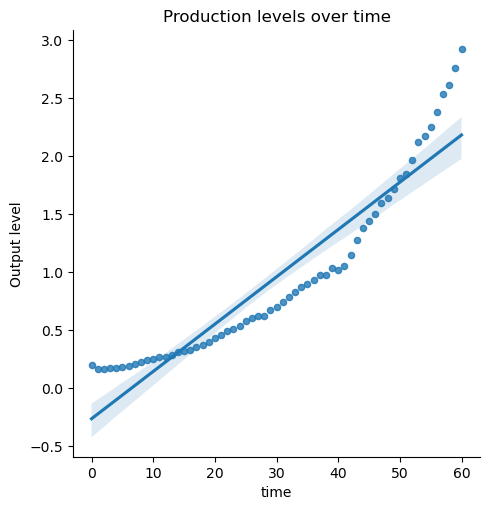

In [90]:
linear_model_plot=sns.lmplot(df,x="time",y="Production",scatter_kws=dict(s=20, alpha=0.8)).set_ylabels("Output level")
plt.title("Production levels over time")

The linear model does not seem to fit the graph well. It may be improved by transforming either the predictor or predicted variables.

In [91]:
df["log_product"]=np.log(df["Production"])
df.head()

,time,Production,log_product
0,0,0.200000,-1.609438
1,1,0.159723,-1.834313
2,2,0.166122,-1.795034
3,3,0.170724,-1.767705
4,4,0.175404,-1.740661


Here we apply the log of production because productivity is exponentially related to technological growth rate.

Text(0.5, 1.0, 'Log of output level versus time')

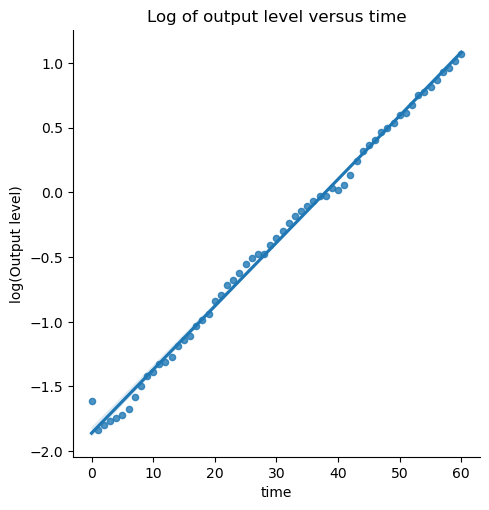

In [92]:
linear_model_plot_2=sns.lmplot(df,x="time",y="log_product",scatter_kws=dict(s=20, alpha=0.8)).set_ylabels("log(Output level)")
plt.title("Log of output level versus time")

After mutating the predictor variable, the linear model fits the data better.

Next, let us explore the coefficients of our linear model.

$$\min_{\beta} {||X\beta - y|| ^ 2 + \alpha ||\beta||}$$

Lasso regression is used to find the coefficients that explain the model well between time and productivity. Compared to linear regression, lasso regression regulates the size of the $\beta$s to minimize the squared residuals. Specifically, it limits the size of the intercept term $\beta_0$ so that the other coefficient better represents how production changes over time.

In [93]:
def fit_and_report_mses(mod, X_train, X_test, y_train, y_test):
    mod.fit(X_train, y_train)
    return dict(
        mse_train=metrics.mean_squared_error(y_train, mod.predict(X_train)),
        mse_test=metrics.mean_squared_error(y_test, mod.predict(X_test))
    )

In [94]:
#Step 1. Test train split
train=df.sample(frac=0.8,random_state=312)
test=df.drop(train.index)

X=df[["time"]]

#Step 2. Designer matrix and predictor variables
X_train=train[["time"]]
X_test=test[["time"]]
y_train=train["log_product"]
y_test=test["log_product"]

Finding the best alpha in cross validation sets:

In [95]:
#Step 3. Find the best alpha for the Lasso model in cross validation
lasso_cv = linear_model.LassoCV(cv=5).fit(X_train,y_train)
best_alpha=lasso_cv.alpha_


#Step 4. Fit the model with the best alpha into the lasso model
lasso_mod=linear_model.Lasso(alpha=best_alpha)
lasso_mod.fit(X_train,y_train)

#Step 5. Compute the MSE of lasso model

mses=fit_and_report_mses(lasso_mod,X_train,X_test,y_train,y_test)

#Step 6. Find the coefficients of the columns
intercept=lasso_mod.intercept_
b1=lasso_mod.coef_

print("The intercept of the model is",round(intercept,7),"and coefficient for predictor is",round(b1[0],7))
print("The mean square error of prediction is", mses["mse_test"])


The intercept of the model is -1.8669531 and coefficient for predictor is 0.0491863
The mean square error of prediction is 0.008122879334745944


Hence the lasso regression model can roughly expressed as

$$y_t=e^ {-1.870474 + 0.0494421\cdot t}$$

where $t$ is the time and $y_t$ is the output at time $t$.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


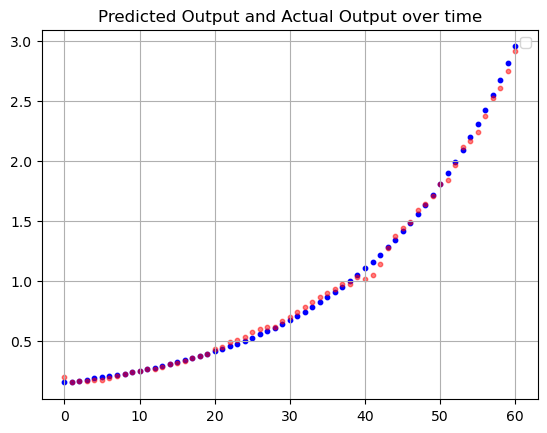

In [96]:
periods=np.arange(61)
fig,ax=plt.subplots()
ax.scatter(X_train.index,np.exp(lasso_mod.predict(X_train)),c="blue",s=10)
ax.scatter(X_test.index,np.exp(lasso_mod.predict(X_test)),c="blue",s=10)
ax.scatter(X_train.index,np.exp(y_train[X_train.index]),c="red",alpha=0.5,s=10)
ax.scatter(X_test.index,np.exp(y_test[X_test.index]),c="red",alpha=0.5,s=10)
plt.title("Predicted Output and Actual Output over time")
ax.legend()
ax.grid(True)
plt.show()

### Conclusions

After the observing result of simulation and analysis on our models, we can answer the research questions we establish before.

In an economy where there is no random shock in production, individual agents and planner can already decide the path and amount to consume in the beginning by finding the solution that satisfied the resource constraint and on the euler's equation path. In addition, given the amount of initial resources an agent have at the beginning of their liftime, we can already infer the amount of consumption, investment and utility level they will be enjoying in the future. 

However, when there are random shocks in the society, individual and planner have no guarentees about the future. Hence,planner will test some policy on how much to consume and how much to invest given the current level of production. The result shows that planner will pick a policy that satisfied the expected value in intertemporal euler's equation and make people work more or less depending on current efficiency of the economy. The simulation shows that consumption and investment varies with production, while productivity varies significantly less than the output because of agent's elasticity in labour. Labour is positively correlated and coincidential with output level.

In terms of predicting about the future, we construct a lasso-regression model where the output will be the exponent of linear combination of lasso coefficients. The model produced a mean square error of 0.00821 on testing set with $n=60$ and a training/testing split of 80%



## References

- “Chad Fulton.” Implementing and Estimating a Simple Real Business Cycle (RBC) Model | Chad Fulton, 29 Jan. 2017, www.chadfulton.com/topics/simple_rbc.html. 

- Population and Economic Growth - University of Pennsylvania, www.sas.upenn.edu/~jesusfv/GEH_7_Malthus.pdf. Accessed 1 July 2023. 

- Bostanci Gorkem, "Intermediate macroeconomic analysis", Business cycle modeling, Neoclassical growth, April 27th, University of British Columbia, Lecture



### Appendix 1

Deriving the Optimality Conditions For Social Planner

**Lagrange**

$ \begin{align}
L =&...+\beta^t \cdot u(c_t) +...\\
&+\lambda_t(k^\alpha_t + (1- \delta)k_t - c_t - k_{t+1}) \\
&+\lambda_{t+1}(k^\alpha_{t+1} + (1-\delta)k_{t+1} - c_{t+1} - k_{t+2})
\end{align}$

**FOCs**

(1) $ \begin{align}
\frac{dL}{dc_t} = \beta^t \cdot (c_t) - \lambda_t &= 0 \\
\lambda_t &= \beta^t \cdot u'(c_t) 
\end{align}$

(2) $ \begin{align}
\frac{dL}{dk_{t+1}} = -\lambda_t + \lambda_{t+1}(\alpha \cdot k^{\alpha-1}_{t+1} + (1-\delta)) &= 0 \\
\lambda_t &= \lambda_{t+1}(\alpha \cdot k^{\alpha-1}_{t+1} + (1- \delta))
\end{align}$

(3) $ 
\frac{dL}{d\lambda_t} = k^\alpha_t + (1-\delta)k_t - c_t - k_{t+1} = 0
$

from (1) we get

$\beta^t \cdot u'(t) = \lambda_t, \quad \beta^{t+1} \cdot u'(t+1) = \lambda_{t+1}$

Note that $u'(c_t) = \frac{1}{c_t}$.



Combining the above results with (2) we get

**Intertemproal Euler's Equation**

$c_{t+1} = \beta(\alpha \cdot k^{\alpha-1}_{t+1} + (1-\delta)) \cdot  c_t$ 


From (3) we get 

**Investment Law of Motion**

$ k_{t+1} = k^\alpha_t + (1-\delta)k_t - c_t$

These two equations help us relate the levels of consumption and investment at two different periods.

### Appendix 2

Deriving the Optimality Conditions For Neoclassical growth

**Lagrange**

$ \begin{align}
L =&...+\beta^t \cdot u(c_t) +...\\
&+\lambda_t(A_tk^\alpha_t + (1- \delta)k_t - c_t - k_{t+1}) \\
&+\lambda_{t+1}(A_{t+1}k^\alpha_{t+1} + (1-\delta)k_{t+1} - c_{t+1} - k_{t+2})
\end{align}$

**FOCs**

(1) $ \begin{align}
\frac{dL}{dc_t} = \beta^t \cdot (c_t) - \lambda_t &= 0 \\
\lambda_t &= \beta^t \cdot u'(c_t) 
\end{align}$

(2) $ \begin{align}
\frac{dL}{dk_{t+1}} = -\lambda_t + \lambda_{t+1}(A_{t+1}\alpha \cdot k^{\alpha-1}_{t+1} + (1-\delta)) &= 0 \\
\lambda_t &= \lambda_{t+1}(A_{t+1}\alpha \cdot k^{\alpha-1}_{t+1} + (1- \delta))
\end{align}$

(3) $ 
\frac{dL}{d\lambda_t} = A_tk^\alpha_t + (1-\delta)k_t - c_t - k_{t+1} = 0
$

from (1) we get

$\beta^t \cdot u'(t) = \lambda_t, \quad \beta^{t+1} \cdot u'(t+1) = \lambda_{t+1}$

Note that $u'(c_t) = \frac{1}{c_t}$.



Combining the above results with (2) we get

**Intertemproal Euler's Equation**

$c_{t+1} = \beta(A_{t+1}\alpha \cdot k^{\alpha-1}_{t+1} + (1-\delta)) \cdot  c_t$ 


From (3) we get 

**Investment Law of Motion**

$ k_{t+1} = A_tk^\alpha_t + (1-\delta)k_t - c_t$

Note that $A_t=A_0(1+g)^t$ and both $A_0$ and $g$ is exogenous

### Appendix 3

Deriving optimal conditions and guess social planner's policy

$ \begin{align}
L =& ...\beta^t \cdot u(c_t, l_t) + \beta^{t+1}\cdot E[u (c_{t+1}, l_{t+1}] \\
&+ \lambda_t(y_{t+1} - c_{t+1} - k_{t+1}) \\
&+ E [\lambda_{t+1} - c_{t+1} - l_{t+1}]...
\end{align}$

$ \frac{dL}{d\lambda_t} = y_t - c_t - k_{t+1} = 0 $

**FOCs:**

$ 
\frac{dL}{dc_t} = \beta^t \cdot \frac{du}{dc_t} - \lambda_t =0  \\
\frac{dL}{dc_{t+1}} = \beta^{t+1} \cdot E[\frac{du}{dc_{t+1}}] - E[\lambda_{t+1}] = 0 \\
\frac{dL}{dl_t} = \beta^t \cdot \frac{du}{dL_t} + \lambda_t \cdot \frac{dy}{dl_t} = 0 \\
\frac{dL}{dk_{t+1}} = -\lambda_t + E[\lambda_{t+1}] \cdot E[\frac{dy_{t+1}}{dk_{t+1}}] = 0 
$

From the above equations, we obtain

$
(1)  \lambda_t = \beta^t \cdot \frac{du}{dc_t} \\
(2)  E[\lambda_{t+1}] = \beta^{t+1} \cdot E[\frac{du}{dc_{t+1}}] \\
(3) \lambda_t \cdot \frac{dy}{dl_t} = -\beta^t \cdot \frac{du}{dl_t} \\
(4) \lambda_t = E[\lambda_{t+1}] \cdot E[\frac{dy_{t+1}}{dk_{t+1}}] \\
(5) y_t = c_t + k_{t+1}
$

**Intratemporal Conditions**

From (1) and (3), we get

$\begin{align}
\beta^t \cdot \frac{du}{dc_t} \cdot \frac{dy}{dl_t} &= -\beta^t \cdot \frac{du}{dl_t} \\
\quad \frac{du}{dc_t} \cdot \frac{dy}{dl_t} &= \frac{du}{dl_t}.
\end{align}$


By substituting
$
\frac{du}{dc_t} = \frac{1}{c_t - \psi \cdot \frac{l^{1+\eta}}{1+\eta}} \\
\frac{dy}{dl_t} = (1-\alpha) \cdot \frac{y_t}{l_t} \\
\frac{du}{dl_t} = \frac{1}{c_t - \psi \cdot \frac{l^{1+\eta}}{1+\eta}} \cdot (-\psi) \cdot l_t^{\eta},
$

we obtain,

$(1-\alpha)\cdot \frac{y_t}{l_t} = \psi \cdot l_t^\eta.$

By further substituting

$y_t = A_t \cdot k_t^\alpha \cdot l_t^{1-\alpha}, $

we obtain

$ \begin{align}
\psi \cdot l_t^\eta &= (1-\alpha) \cdot A_t \cdot k_t^\alpha \cdot l_t^{-\alpha} \\
l_t^{\eta + \alpha} &= \frac{1-\alpha}{\psi} \cdot A_t \cdot k_t^\alpha \\
l_t &= (\frac{1-\alpha}{\psi} \cdot A_t \cdot k_t^\alpha)^{\frac{1}{\eta + \alpha}}
\end{align}$ 

(the labour profile).


**Intertemporal Euler Equation**

From (1),(2), and (4) we obtain,

$ \beta^t \cdot \frac{1}{c_t - \psi \cdot \frac{l_t^{1+\eta}}{1+\eta}} 
= \beta^{t+1} \cdot E[\alpha \cdot \frac{y_{t+1}}{k_{t+1}}] \cdot [\frac{1}{c_{t+1} - \psi \cdot \frac{l_{t+1}^{1+\eta}}{1+\eta}}]. $

And since $k_{t+1}$ is known at time $t$, we obtain our Intertemporal Euler Equation:

$\frac{1}{c_{t+1} - \psi \cdot \frac{l_{t+1}^{1+\eta}}{1+\eta}} = \frac{\alpha\beta}{k_{t+1}} \cdot E[\frac{y_{t+1}}{c_{t+1} - \psi \cdot \frac{l_{t+1}^{1+\eta}}{1+\eta}}]$




**Guessing planner's policy function and proof by conjecture**

We guess that $k_{t+1} = \alpha \beta \cdot y_t.$

From (5), $c_t = (1-\alpha\beta)y_t.$

From the labour profile, we obtain

$\begin{align}
\psi \cdot l_t^{\eta} &= (1-\alpha) \frac{y_t}{l_t} \\
\psi \cdot \frac{l_t^{1+\eta}}{1+\eta} &= \frac{1-\alpha}{1+\eta} \cdot y_t
\end{align}$

Plug the above two into the Intertemporal Euler Equation to obtain,

$ \begin{align} 
\frac{1}{(1-\alpha\beta)y_t - \frac{1-\alpha}{1+\eta}y_t} &= \frac{\alpha\beta}{k_{t+1}} \cdot E[\frac{y_{t+1}}{(1-\alpha\beta)y_{t+1} - \frac{1-\alpha}{1+\eta}y_{t+1}}] \\
\frac{1}{(1-\alpha\beta - \frac{1-\alpha}{1+\eta})y_t} &= \frac{\alpha\beta}{k_{t+1}} \cdot E[\frac{y_{t+1}}{(1-\alpha\beta - \frac{1-\alpha}{1+\eta})y_{t+1}}] \\
\frac{1}{y_t} &= \frac{\alpha\beta}{k_{t+1}}\\
\alpha\beta \cdot y_t &= k_{t+1}.
\end{align}$

(Proof complete.)

Therefore, a path satisfying the optimal condition is

$k_{t+1} = \alpha\beta \cdot y_t, \quad c_t = (1-\alpha\beta) \cdot y_t$

policy functions.
